# Métodos numéricos para la valoración de opciones

In [5]:
import numpy as np
from matplotlib import pyplot as plt

**Simulación de trayectoria**

In [36]:
# Parametros
N = 200
dt = 1/512
mu = 0.5
sg = 0.3
B = np.zeros(N)
# Condicion inicial
X0 = 10

In [37]:
B[0] = 0
for i in range(1,N):
    B[i] = B[i-1] - np.sqrt(dt)*np.random.normal()
X = np.zeros(N)
X[0] = X0
for i in range(1,N):
    X[i] = X[i-1] + mu*X[i-1]*dt + sg*X[i-1]*(B[i] - B[i-1])

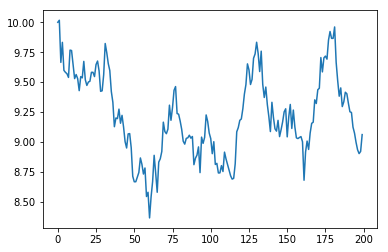

In [38]:
plt.plot(X)
plt.show()

In [39]:
R = np.zeros(N)
# Retornos instantáneos
for j in range(1,N):
        R[j-1] = (X[j] - X[j-1])/X[j-1]
    #ri = mudti + sigmadbi

In [42]:
dt = 1/len(R)
media = np.mean(R)
varianza = np.var(R)
mu = media/dt
sigma = np.sqrt(varianza/dt)
print('mu: '+str(mu)+'\n'+'sigma: '+str(sigma))

mu: -0.08075843585845523
sigma: 0.1885283524694161


**Precio de ejercicio**

In [60]:
k = 10000 # Numero de trayectorias
T = 1 # Periodo de maduración
S = np.zeros((k,200))
for i in range(k):
    S[i,0] = X[-1]
for i in range(k):
    for j in range(1,T):
        S[i,j] = S[i, j-1] + mu*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()

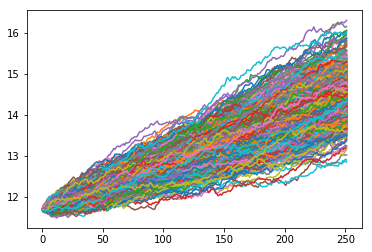

In [12]:
plt.plot(np.matrix(S).T)
plt.show()

In [13]:
K = 15 # Precio de ejercicio

## Fórmula de Black-Scholes

In [43]:
sigma = 0.3
r = 0.05 # La tasa de interes libre de riesgo
S0 = X[-1]
T = 1
d1 = (np.log(S0/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

In [46]:
import scipy.stats as ss
N = ss.norm(0,1)
fcall = S0*N.cdf(d1) - K*np.exp(-r*T)*N.cdf(d2)
print('fcall:', fcall)

fcall: 0.09616354797661275


## Simulación Montecarlo

In [70]:
def opcion(x):
    for i in range(10000):
        for j in range(1,200):
            S[i,j] = S[i, j-1] + r*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()
    pa = np.zeros(k)
    for i in range(k):
        pa[i] = np.maximum(S[i,-1]-K,0)
    media = np.mean(pa)
    opcion = np.exp(-r*T)*media
    return opcion

In [72]:
from multiprocessing import Pool
p = Pool(100)
yy = p.map(opcion, range(1000))

0
15
33
30
6
9
3
39
24
12
21
42
81
69
57
54
48
60
72
27
90
36
18
144
96
117
141
45
51
102
99
186
207
189
129
135
84
75
105
201
240
126
210
258
63
195
114
192
183
111
156
120
123
87
204
198
249
132
159
267
66
294
282
153
174
180
150
261
219
147
270
138
255
225
216
234
246
78
108
93
285
168
177
171
165
297
231
237
273
276
288
252
162
222
291
243
213
264
228
279
274
199
208
205
232
298
106
16
295
109
82
157
94
160
58
187
130
67
193
277
184
22
202
268
34
112
31
49
196
43
211
253
127
7
76
259
1
115
136
190
70
271
85
88
238
250
133
169
229
52
226
262
97
178
91
283
55
28
289
103
118
244
172
214
10
292
37
235
25
19
247
142
79
73
46
40
148
220
280
217
13
241
139
223
154
286
265
163
256
121
175
4
166
124
100
61
64
145
151
181
233
107
275
185
95
17
68
209
203
77
32
278
212
272
260
59
194
254
83
2
8
191
44
239
251
137
200
161
50
206
89
269
188
113
35
23
158
131
110
134
299
71
116
98
227
296
284
197
86
128
179
29
236
173
215
245
74
20
26
242
224
167
65
14
248
92
47
266
257
119
230
53
122
263
56
293

In [73]:
yy = np.array(yy)
print('media:', np.mean(yy))
print('Minimo:', np.min(yy))
print('Maximo:', np.max(yy))

media: 0.09795771268218215
Minimo: 0.061298955105342605
Maximo: 0.1415750915936253


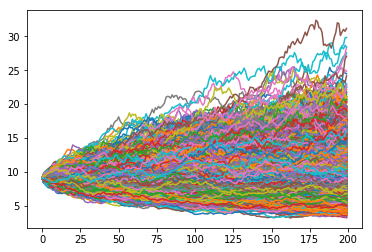

In [74]:
plt.plot(np.matrix(S).T)
plt.show()

## Árboles binomiales

In [86]:
n = 50
dt = 1/50
u = np.exp(sigma*np.sqrt(dt)) # Proporción de subida
d = 1/u # Proporción de bajada
p = (np.exp(r*dt)-d)/(u-d) # Probabilidad de salto

In [87]:
A = np.zeros((n+1,n+1))
A[0,0] = S0

In [88]:
for i in range(1,n+1):
    for j in range(i+1):
        A[i,j] = S0*(u**(i-j))*(d**j)

In [89]:
f = np.zeros_like(A)
for j in range(n+1):
    f[n,j] = np.maximum(S0*(u**(n-j))*(d**(j)) - K,0)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        f[i,j] = np.exp(-r*dt)*(p*f[i+1,j+1] + (1-p)*f[i+1,j])

In [90]:
f[0,0]

0.08531952104865143